<a href="https://colab.research.google.com/github/sandeepss2020/Neural_Network-DL/blob/main/NNDL_LAB7_RBF_BPN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RBFN has oly one hidden node. When data is not linearly separable. We have to convert the data into linearly separable form by two steps - 
*   Increasing the dimensionality (Not Mandetory)
*   Expanding the Direction.(In horizontal... Mandetory) i.e, Changing the direction --> 
We are having three different methods to achieve this 
a) Multiquadratic , b) Inverse multiquadratic, c) Guassian function.
Taking any one data point as a center. 



# ***BPN WITH IRIS DATASET***

In [152]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [153]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [154]:
dataset_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')

In [155]:
dataset_iris = dataset_iris.drop(columns=['Id',],axis=1)

In [121]:
# dataset_iris.info()


In [156]:
dataset_iris['Species'] = Le.fit_transform(dataset_iris['Species'])

In [157]:
features = dataset_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

# print(type(features))
# features_li = features.values.tolist()
# print(type(li))

label = dataset_iris[['Species']]

# label_list = label.values.tolist()
# print(f"Features -> \n {features} \n and Label -> \n {label}")



In [158]:
X = features
y = label
X = pd.get_dummies(X).values
y = pd.get_dummies(y).values

In [125]:
# print(X)
# print(y)

In [159]:
X_train , X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state= 4)

In [188]:
learning_rate = 0.25
iterations = 1500  #5000 can be changed
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])
print(results)

Empty DataFrame
Columns: [mse, accuracy]
Index: []


In [189]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
print(W1)
# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 
print(W2)

[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]
[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


In [190]:
def sigmoid(x):
  # binary_sig = ( 1 - np.exp(-x))/( 1 + np.exp(-x))
  # return binary_sig
  return 1 / (1 + np.exp(-x))


def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()



In [191]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer|
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

print(mse)
print(results)

0.20817806871461284
           mse  accuracy
0     0.449959  0.000000
1     0.442991  0.000000
2     0.436139  0.000000
3     0.429475  0.000000
4     0.423040  0.000000
...        ...       ...
1495  0.208183  0.641667
1496  0.208182  0.641667
1497  0.208181  0.641667
1498  0.208179  0.641667
1499  0.208178  0.641667

[1500 rows x 2 columns]


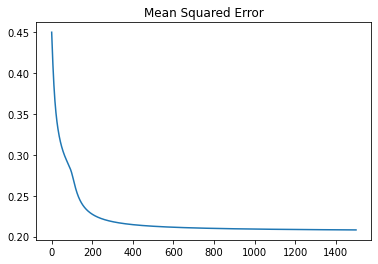

In [192]:
results.mse.plot(title="Mean Squared Error")
# results.accuracy.plot(title="Accuracy")


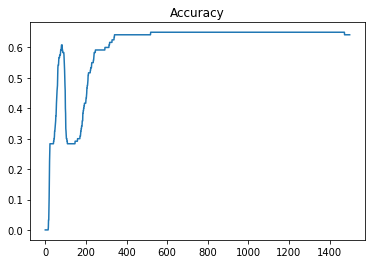

In [193]:
results.accuracy.plot(title="Accuracy")

In [194]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8333333333333334


WITH SKLEARN DATASET OF IRIS

In [108]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math
from sklearn.metrics import accuracy_score

In [196]:
# Load dataset
data22 = load_iris()

# Get features and target
X2=data22.data
y2=data22.target
y2 = pd.get_dummies(y2).values
# print(X2)
# print(y2)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=4)


In [198]:
# Initialize variables
learning_rate2 = 0.25
iterations2 = 1500
N2 = y_train.size

# number of input features
input_size2 = 4

# number of hidden layers neurons
hidden_size2 = 2 

# number of neurons at the output layer
output_size2 = 3  

results2 = pd.DataFrame(columns=["mse", "accuracy"])

In [199]:
np.random.seed(10)


# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size2, hidden_size2))   
print(W1)
# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size2 , output_size2)) 
print(W2)

[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]
[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


In [200]:
def sigmoid2(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error2(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
def accuracy2(y_pred, y_true):
    acc2 = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc2.mean()

In [201]:
for itr in range(iterations2):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid2(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid2(Z2)

    
    
    # Calculating error
    mse2 = mean_squared_error2(A2,y_train)
    acc2 = accuracy2(A2, y_train)
    results2=results2.append({"mse":mse2, "accuracy":acc2},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update2 = np.dot(A1.T, dW1) / N2
    W1_update2 = np.dot(X_train.T, dW2) / N2

    W2 = W2 - learning_rate2 * W2_update2
    W1 = W1 - learning_rate2 * W1_update2
print(mse2)
print(results2)

0.06582601651933992
           mse  accuracy
0     0.140435  0.341667
1     0.139471  0.341667
2     0.138518  0.341667
3     0.137579  0.341667
4     0.136659  0.341667
...        ...       ...
1495  0.065852  0.658333
1496  0.065846  0.658333
1497  0.065839  0.658333
1498  0.065833  0.658333
1499  0.065826  0.658333

[1500 rows x 2 columns]


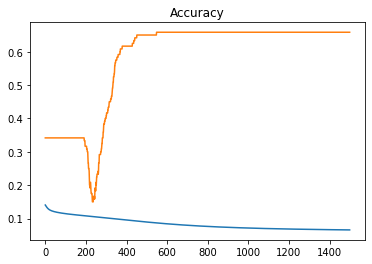

In [202]:
results2.mse.plot(title="Mean Squared Error")
results2.accuracy.plot(title="Accuracy")

In [203]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid2(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid2(Z2)

acc2 = accuracy2(A2, y_test)
print("Accuracy: {}".format(acc2))

Accuracy: 0.7


# ***RBFNN***

In [204]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# import statsmodels.api as sm
# import seaborn as sns
# sns.set()



In [221]:
data_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
data_iris = data_iris.drop(columns=['Id',],axis=1)
data_iris['Species'] = Le.fit_transform(data_iris['Species'])
# data_iris

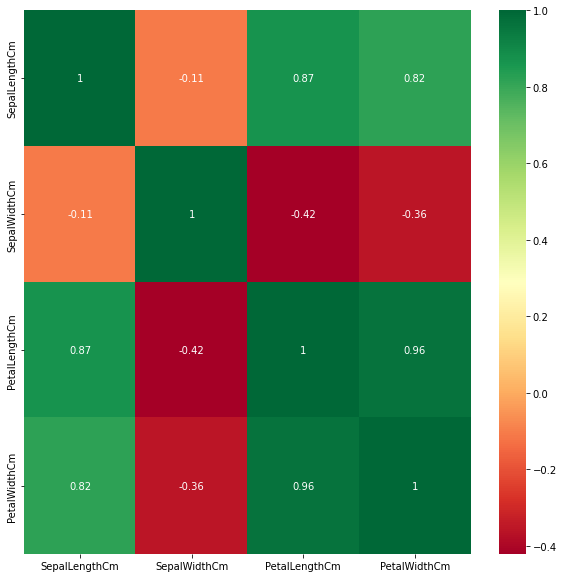

In [216]:
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def show_correlation_graph(data_iris: pd.DataFrame, figsize: Tuple):
    plt.figure(figsize=figsize)
    corrmat = data_iris.corr()
    top_corr_features = corrmat.index
    sns.heatmap(data_iris[top_corr_features].corr(), annot=True, cmap="RdYlGn")
    plt.show()

show_correlation_graph(data_iris,(10,10))

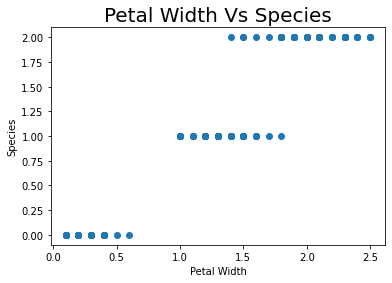

In [222]:
plt.scatter(data_iris['PetalWidthCm'],data_iris['Species'])
plt.xlabel('Petal Width')
plt.ylabel('Species')
plt.title('Petal Width Vs Species', fontsize = 20)
plt.show()

<ipython-input-223-ae542a48ad43>:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-223-ae542a48ad43>:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-223-ae542a48ad43>:6: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(x)


Text(0, 0.5, 'WCSS')

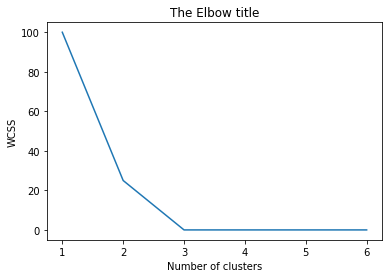

In [223]:
# x= data[['PetalWidthCm']]
x= data_iris[['Species']]
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [276]:
feat_x = data_iris.drop('Species',axis=1)
label_y = data_iris[['Species']]
# print(feat_x)
# print(label_y)

In [277]:
x_train , x_test, y_train, y_test = train_test_split (feat_x,label_y,test_size=0.3, random_state= 4)

In [278]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

In [279]:
k_cent = 3
km = KMeans(n_clusters=k_cent, max_iter=100)
km.fit(x_train)
cent = km.cluster_centers_
print(cent)

[[-1.13399257  0.94699437 -1.47498427 -1.39238606]
 [ 0.97057734  0.15871627  0.88940821  0.94233129]
 [-0.13423599 -0.90953436  0.21858443  0.0980615 ]]


In [280]:
max = 0
for i in range(k_cent):
  for j in range(k_cent):
    d = np.linalg.norm(cent[i]-cent[j])
    if(d>max):
      max=d
d = max

sigma = d/math.sqrt(2*k_cent)

print(d)
print(sigma)

4.011465293041865
1.6376738481394608


In [281]:
shape = x_train.shape
row = shape[0]
column = k_cent
G = np.empty((row, column), dtype = float)

for i in range(row):
  for j in range(column):
    dist = np.linalg.norm(x_train[i]-cent[j])
    G[i][j] = math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [282]:
GTG = np.dot(G.T, G)
GTG_inv = np.linalg.inv(GTG)
fac = np.dot(GTG_inv, G.T)
W = np.dot(fac, y_train)

In [283]:
row = x_test.shape[0]
column = k_cent
G_test = np.empty((row, column),dtype = float)
for i in range(row):
  for j in range(column):
    dist = np.linalg.norm(x_test[i]-cent[j])
    G_test[i][j] = math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [284]:
km.inertia_

100.7831030189146

In [285]:
prediction = np.dot(G_test, W)
prediction = 0.5*(np.sign(prediction - 0.5) + 1)

score = accuracy_score(prediction, y_test)
print(score)
# print(score.mean())

0.6444444444444445


In [286]:
y_pred = km.predict(x_test)
# print(y_test)
# print(y_pred)
print ('Accuracy-RBF:', accuracy_score(y_test, y_pred))


Accuracy-RBF: 0.6


In [274]:
# s = km.fit(feat_x)
# labels = s.labels_
# print(labels)

# check how many of the samples were correctly labeled
# correct_labels = sum(y == labels)
# # print(correct_labels)
# correct_labels = 0
# for i in range(len(y)):
#   if y[i] == labels[i]:
#     correct_labels+=1
# print(f"Result: {correct_labels} out of {len(y)} samples were correctly labeled.")

correct_labels = sum(y == labels)

# print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

# Accuracyscore = (correct_labels/float(y.size))
# print('Accuracy score: {0:0.2f}'. format(Accuracyscore))

USING SCIKIT

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle



In [ ]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)


In [ ]:
# Scaling the data using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# determining centers/centroids of neuron using K-Means Clustering Algorithm
K_cent = 2
km = KMeans(n_clusters=K_cent, max_iter = 100)
km.fit(X_train)
cent = km.cluster_centers_

In [ ]:
max = 0
for i in range(K_cent):
  for j in range(K_cent):
    d = np.linalg.norm(cent[i]-cent[j])
    if(d>max):
      max = d


d=max

sigma = d/math.sqrt(2*K_cent)

In [ ]:
# setting up matrix G
shape = X_train.shape
row = shape[0]
column = K_cent
G = np.empty((row, column), dtype = float)

for i in range(row):
  for j in range(column):
    dist = np.linalg.norm(X_train[i]-cent[j])
    G[i][j] = math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [ ]:
# finding weight matrix W to train the network
GTG = np.dot(G.T, G)
GTG_inv = np.linalg.inv(GTG)
fac = np.dot(GTG_inv, G.T)
W = np.dot(fac, y_train)

In [ ]:
row = X_test.shape[0]
column = K_cent
G_test = np.empty((row, column),dtype = float)
for i in range(row):
  for j in range(column):
    dist = np.linalg.norm(X_test[i]-cent[j])
    G_test[i][j] = math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [ ]:
prediction = np.dot(G_test, W)
prediction = 0.5*(np.sign(prediction - 0.5) + 1)

score = accuracy_score(prediction, y_test)
print(score)
# print(score.mean())

0.65
